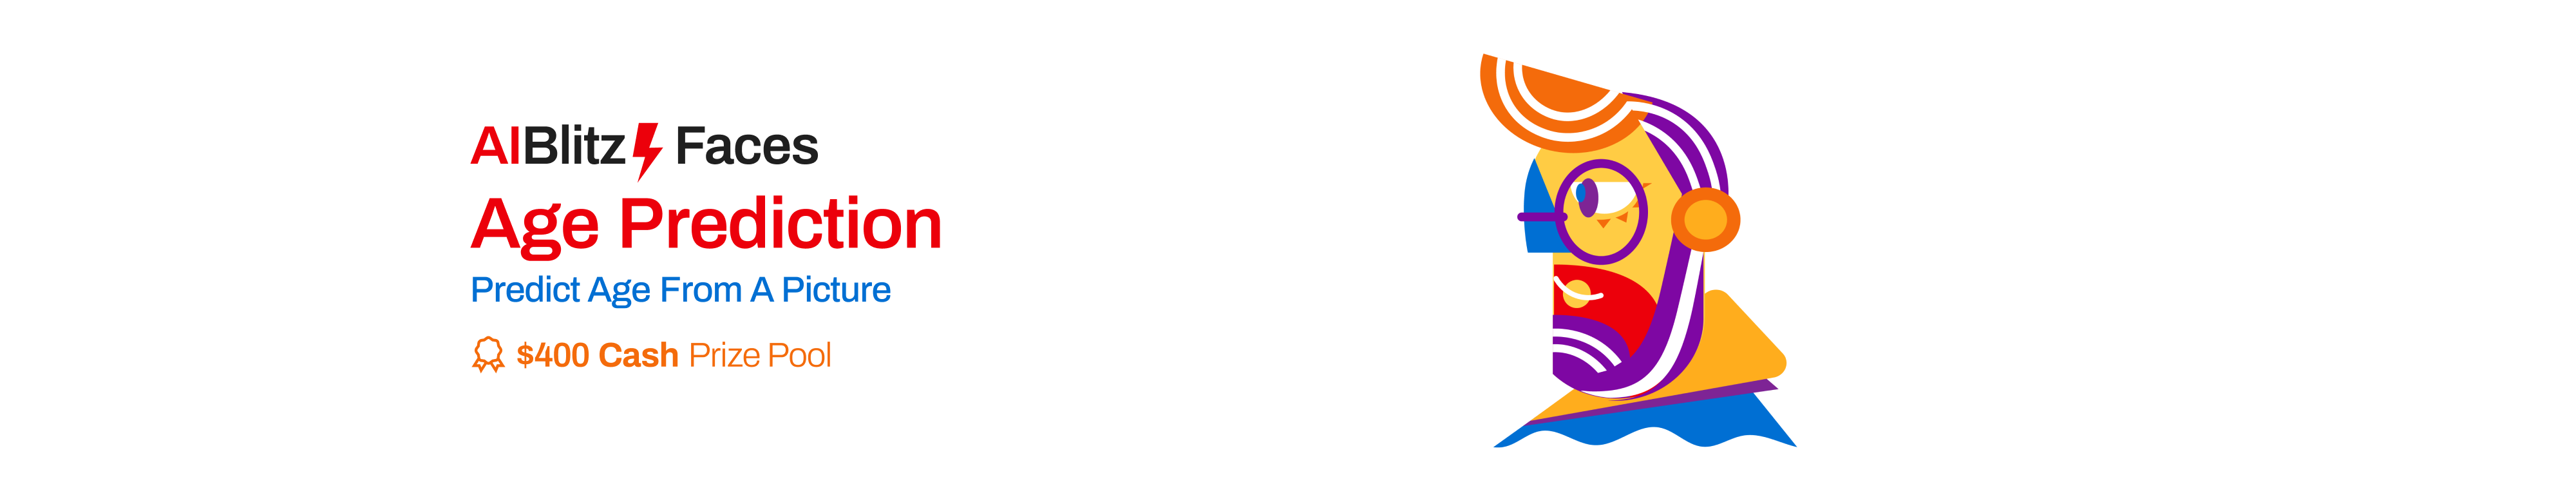

<h2><center> Getting Started with Age Prediction</center></h2>

In this puzzle, we have to predict the age from the given human faces.

This is a starter kit explaining how to download the data and also submit direcly via this notebook. 

We will be the sample submission file directly in the required format. 





# Download the files 💾¶
## Download AIcrowd CLI

We will first install aicrowd-cli which will help you download and later make submission directly via the notebook.


In [ ]:
!pip install aicrowd-cli
%load_ext aicrowd.magic

     |████████████████████████████████| 44 kB 1.2 MB/s 
     |████████████████████████████████| 214 kB 9.3 MB/s 
     |████████████████████████████████| 1.1 MB 47.9 MB/s 
     |████████████████████████████████| 54 kB 2.0 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 170 kB 45.7 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 51 kB 5.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pyzmq
    Found existing installation: pyzmq 22.3.0
    Uninstalling pyzmq-22.3.0:
      Successfully uninstalled pyzmq-22.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have


## Login to AIcrowd ㊗¶


In [ ]:
%aicrowd login

Please login here: https://api.aicrowd.com/auth/cbvf76iXS5k5TR0Y1sLParTPM-FZWg6hljxapmZTMho
API Key valid
Saved API Key successfully!



## Download Dataset¶

We will create a folder name data and download the files there.


In [ ]:
!rm -rf data
!mkdir data
%aicrowd ds dl -c age-prediction -o data

sample_submission.csv:   0%|          | 0.00/36.0k [00:00<?, ?B/s]

train.csv:   0%|          | 0.00/48.3k [00:00<?, ?B/s]

train.zip:   0%|          | 0.00/236M [00:00<?, ?B/s]

val.csv:   0%|          | 0.00/24.2k [00:00<?, ?B/s]

val.zip:   0%|          | 0.00/117M [00:00<?, ?B/s]

In [ ]:
!unzip data/train.zip -d data/train > /dev/null
!unzip data/val.zip -d data/val > /dev/null
!unzip data/test.zip -d data/test > /dev/null

unzip:  cannot find or open data/test.zip, data/test.zip.zip or data/test.zip.ZIP.


## Importing Libraries:

In [ ]:
import pandas as pd
import numpy as np
import os

## Diving in the dataset 🕵️‍♂️

In [ ]:
train_df = pd.read_csv("data/train.csv")
val_df = pd.read_csv("data/val.csv")

In [ ]:
test_df = pd.read_csv("data/test.csv")

╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│                                                                                           │
│ /usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882 in run_code  │
│                                                                                           │
│   2879 │   │   │   try:                                                                   │
│   2880 │   │   │   │   self.hooks.pre_run_code_hook()                                     │
│   2881 │   │   │   │   #rprint('Running code', repr(code_obj)) # dbg                      │
│ ❱ 2882 │   │   │   │   exec(code_obj, self.user_global_ns, self.user_ns)                  │
│   2883 │   │   │   finally:                                                               │
│   2884 │   │   │   │   # Reset our crash handler in place                                 │
│   2885 │   │   │   │   sys.excepthook = old_excepthook                                    │
│ <ipython-input-8-60348e969ddc>:1 in <module>                                              │
│                                                                                           │
│ /usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311 in wrapper          │
│                                                                                           │
│   308 │   │   │   │   │   FutureWarning,                                                  │
│   309 │   │   │   │   │   stacklevel=stacklevel,                                          │
│   310 │   │   │   │   )                                                                   │
│ ❱ 311 │   │   │   return func(*args, **kwargs)                                            │
│   312 │   │                                                                               │
│   313 │   │   return wrapper                                                              │
│   314                                                                                     │
│                                                                                           │
│ /usr/local/lib/python3.7/dist-packages/pandas/io/parsers/readers.py:586 in read_csv       │
│                                                                                           │
│    583 │   )                                                                              │
│    584 │   kwds.update(kwds_defaults)                                                     │
│    585 │                                                                                  │
│ ❱  586 │   return _read(filepath_or_buffer, kwds)                                         │
│    587                                                                                    │
│    588                                                                                    │
│    589 @deprecate_nonkeyword_arguments(                                                   │
│                                                                                           │
│ /usr/local/lib/python3.7/dist-packages/pandas/io/parsers/readers.py:482 in _read          │
│                                                                                           │
│    479 │   _validate_names(kwds.get("names", None))                                       │
│    480 │                                                                                  │
│    481 │   # Create the parser.                                                           │
│ ❱  482 │   parser = TextFileReader(filepath_or_buffer, **kwds)                            │
│    483 │                                                                                  │
│    484 │   if chunksize or iterator:                                                      │
│    485 │   │   return parser                                                              │
│                                                   

In [ ]:
train_df.head()
train_df.shape

(4000, 2)

## Generating Prediction File

In this starter kit we will directly be submitting the sample prediction file. In case you would like to see a submission via baseline model, check it out here. 

In [ ]:
submission = pd.read_csv('data/sample_submission.csv')

In [ ]:
!rm -rf assets
!mkdir assets
submission.to_csv(os.path.join("assets", "submission.csv"))


# Submitting our Predictions

Note : Please save the notebook before submitting it (Ctrl + S)


In [ ]:
%aicrowd notebook submit -c age-prediction -a assets --no-verify

Using notebook: Copy of Getting Starter Kit for Sentiment Classification  for submission...
Scrubbing API keys from the notebook...


Output()

╭─────────────────────────╮                                                  
                                                  │ Successfully submitted! │                                                  
                                                  ╰─────────────────────────╯

                                                        Important links                                                        
┌──────────────────┬──────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│  This submission │ https://www.aicrowd.com/challenges/ai-blitz-xiii/problems/age-prediction/submissions/172624              │
│                  │                                                                                                          │
│  All submissions │ https://www.aicrowd.com/challenges/ai-blitz-xiii/problems/age-prediction/submissions?my_submissions=true │
│                  │                                                                                                          │
│      Leaderboard │ https://www.aicrowd.com/challenges/ai-blitz-xiii/problems/age-prediction/leaderboards                    │
│                  │                                                                                                          │
│ Discussion forum │ https://discourse.aicrowd.com/c/ai-blitz-xiii                                                            │
│                  │                                                                                                          │
│   Challenge page │ https://www.aicrowd.com/challenges/ai-blitz-xiii/problems/age-prediction                                 │
└──────────────────┴──────────────────────────────────────────────────────────────────────────────────────────────────────────┘